## Laboratory work 1: The human brain connectome

Dear students!

In our first laboratory activity, we would like to invite you to explore the human brain connectome that was obtained as part of our research project __[Human Connectome Project (HCP)](https://www.humanconnectome.org/)__ (in the following __[article](https://link.springer.com/article/10.1007/s11571-017-9445-1)__).

You have been provided with __[several files](https://drive.google.com/drive/folders/1aLmWQfYGP5jOa0cojA5zgpPP3sMeso_Li7r9KZaJ6GVSpMupYsIjeBmKa3oZ69LXiuSaWyul?usp=sharing)__ for the same connectome at different resolutions, in case you would like to manipulate the data on smaller graphs or use some more complex algorithms.

However, it is recommended to present the final results at the highest possible resolution of the connectome.

Total points for all problems: `100`

In [1]:
from collections import defaultdict
from typing import Union
import os.path as osp
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import networkx as nx

### Utils

In [2]:
def brain_area_function(
    brain_area_name: str,
    map: dict[str, str] = None,
) -> str:
    """
    Retrieves the function of a brain area by mapping its name through a provided dictionary.
    If the brain area name is not found, returns the original name.

    Args:
        brain_area_name (str):
            The name of the brain area.
        map (dict[str, str], optional):
            A dictionary mapping brain area names to their respective functions.
            Defaults to an empty dictionary if not provided.

    Returns:
        str: The mapped function of the brain area if available, otherwise the original name.
    """
    if map is None:
        map = {
            "Cortical": "Higher cognitive functions, thinking",
            "Subcortical": "Movement regulation, emotions, memory",
            "Parstriangularis": "Speech processing, language comprehension",
            "Precentral": "Movement control (motor cortex)",
            "Superiorparietal": "Spatial perception, attention",
            "Lateraloccipital": "Visual information processing",
            "Entorhinal": "Memory formation, connection with the hippocampus",
            "Left-pallidum": "Movement, regulation of motor functions",
            "Right-pallidum": "Movement, regulation of motor functions",
            "Posteriorcingulate": "Memory, attention, orientation",
            "Caudalmiddlefrontal": "Planning, cognitive control",
            "Right-thalamus-proper": "Transmission of sensory signals to the cortex",
            "Left-thalamus-proper": "Transmission of sensory signals to the cortex",
            "Left-amygdala": "Emotions, fear, aggression",
            "Right-amygdala": "Emotions, fear, aggression",
            "Parsopercularis": "Speech production, sound processing",
            "Caudalanteriorcingulate": "Emotion control, decision-making",
            "Parsorbitalis": "Regulation of behavior, social interactions",
            "Medialorbitofrontal": "Training, evaluation of remuneration",
            "Right-accumbens-area": "Motivation, reward system",
            "Left-accumbens-area": "Motivation, reward system",
            "Lingual": "Visual information processing",
            "Right-caudate": "Movement control, training",
            "Left-caudate": "Movement control, training",
            "Postcentral": "Sensory information, sense of touch",
            "Temporalpole": "Memory, emotion processing",
            "Precuneus": "Consciousness, self-awareness, attention",
            "Middletemporal": "Processing of hearing and visual information",
            "Transversetemporal": "Sound and speech analysis",
            "Insula": "Body sensations, emotions, pain perception",
            "Paracentral": "Control of leg and trunk movements",
            "Left-putamen": "Movement, skill formation",
            "Right-putamen": "Movement, skill formation",
            "Lateralorbitofrontal": "Emotion control, decision-making",
            "Isthmuscingulate": "Emotions, memory, behavior regulation",
            "Fusiform": "Face and object recognition",
            "Rostralmiddlefrontal": "Planning, decision-making",
            "Supramarginal": "Speech comprehension, sensorimotor integration",
            "Right-hippocampus": "Formation of long-term memory",
            "Left-hippocampus": "Formation of long-term memory",
            "Cuneus": "Processing of visual stimuli",
            "Bankssts": "Speech analysis, sound perception",
            "Frontalpole": "Abstract thinking, planning",
            "Superiortemporal": "Speech and sound processing",
            "Inferiorparietal": "Integration of hearing, vision, and attention",
            "Pericalcarine": "Primary visual cortex, image processing",
            "Parahippocampal": "Memory, spatial orientation",
            "Brain-stem": "Vital functions (breathing, heart)",
            "Superiorfrontal": "Attention control, motor planning",
            "Rostralanteriorcingulate": "Emotions, behavior control",
            "Inferiortemporal": "Object recognition, visual image processing",
        }

    return map.get(brain_area_name, brain_area_name)


def canonize_key(
    key: str,
) -> str:
    """
    Converts a given key into a standardized format by:
    - Removing hemisphere indicators (`lh`, `rh`).
    - Replacing periods with underscores.
    - Stripping numerical suffixes.
    - Capitalizing the first letter.

    Args:
        key (str):
            The key to be standardized.

    Returns:
        str: A canonized version of the key.
        ```
    """
    splitted_key = list(filter(
        lambda s: s not in ['lh', 'rh'],
        key.lower().replace('.', '_').split('_')
    ))

    canonized_key = splitted_key[0] if splitted_key else key
    canonized_key = canonized_key.rstrip('0123456789').capitalize()

    return canonized_key


def get_neuron_info(
    neuron_data: dict[str, str],
    map: dict[str, str] = None,
) -> tuple[str, str, str, str]:
    """
    Extracts and standardizes neuron information, including its region, name, hemisphere,
    and function, using optional mapping.

    Args:
        neuron_data (dict[str, str]):
            A dictionary containing neuron attributes, including:
            - "dn_region": The region where the neuron is located.
            - "dn_name": The name of the neuron.
            - "dn_hemisphere": The hemisphere (left/right) where the neuron is located.
        map (dict[str, str], optional):
            A dictionary mapping neuron attributes to their standardized values.
            Defaults to an empty dictionary if not provided.

    Returns:
        tuple[str, str, str, str]: A tuple containing:
            - Standardized region name.
            - Standardized neuron name.
            - Standardized hemisphere.
            - Mapped function of the neuron.
        ```
    """

    region = canonize_key(neuron_data.get('dn_region', 'N/A'))
    name = canonize_key(neuron_data.get('dn_name', 'N/A'))
    hemisphere = canonize_key(neuron_data.get('dn_hemisphere', 'N/A'))
    function = brain_area_function(name, map=map)

    # return (
    #     translate_key(region, map=map),
    #     translate_key(name, map=map),
    #     translate_key(hemisphere, map=map),
    #     function,
    # )
    return (
        region,
        name,
        hemisphere,
        function,
    )


In [4]:
def get_node_colors(
    node_attrs: list,
) -> list:
    """
    Assigns RGB colors to unique node attributes and returns a list of corresponding colors.

    Args:
        node_attrs (list):
            A list of node attributes, where each attribute represents a category.
            Nodes with the same attribute will be assigned the same color.

    Returns:
        list:
            A list of RGB color strings (formatted as "rgb(R, G, B)") corresponding to each
            attribute in the input list.
    """

    # Obtain unique attributes
    unique_attrs = list(set(node_attrs))

    # Assign RGB colors to the attributes
    cmap = plt.get_cmap("turbo", len(unique_attrs))
    color_map = {
        attr: f"rgb({int(cmap(i)[0]*255)}, {int(cmap(i)[1]*255)}, {int(cmap(i)[2]*255)})"
        for i, attr in enumerate(unique_attrs)
    }

    # Assign corresponding colors to the nodes
    node_colors = [color_map[attr] for attr in node_attrs]

    return node_colors


In [3]:
def plot_connectome(
    G: nx.Graph,
    node_colors: Union[str, list[str]] = 'red',
    show_legend: bool = True,
):
    """
    Plots a 3D connectome graph based on node positions and connectivity.

    Args:
        G:
            A NetworkX graph containing nodes with attributes 'dn_position_x',
            'dn_position_y', and 'dn_position_z'.
        node_colors (str or list, optional):
            The color(s) assigned to nodes. Can be a single color or a list matching
            the number of nodes.
        show_legend (bool, optional):
            Whether to display a legend grouping nodes by color. Defaults to True.

    Returns:
        None: Displays an interactive 3D plot of the connectome.
    """

    # Extract node positions
    positions = {node: (
        float(data['dn_position_x']),
        float(data['dn_position_y']),
        float(data['dn_position_z'])
        )
        for node, data in G.nodes(data=True)
    }

    # Edges coordinates
    edge_x = []
    edge_y = []
    edge_z = []

    for edge in G.edges():
        x0, y0, z0 = positions[edge[0]]
        x1, y1, z1 = positions[edge[1]]
        edge_x.extend([x0, x1, None])
        edge_y.extend([y0, y1, None])
        edge_z.extend([z0, z1, None])

    # Nodes coordinates
    node_x = [pos[0] for pos in positions.values()]
    node_y = [pos[1] for pos in positions.values()]
    node_z = [pos[2] for pos in positions.values()]

    # Additional node info
    node_info = [
        "Region: {0}<br>Name: {1}<br>Hemisphere: {2}<br>Function: {3}".format(*get_neuron_info(data))
        for node, data in G.nodes(data=True)
    ]

    # Create 3D plot
    fig = go.Figure(layout={'width': 1200, 'height': 800})

    # Plot edges
    fig.add_trace(go.Scatter3d(
        x=edge_x, y=edge_y, z=edge_z,
        mode='lines',
        line=dict(color='rgba(0, 0, 255, 0.1)', width=1),
        name='edges',
        hoverinfo='skip',
        showlegend=False,
    ))

    # Plot nodes
    fig.add_trace(go.Scatter3d(
        x=node_x, y=node_y, z=node_z,
        mode='markers',
        marker=dict(size=5, color=node_colors),
        text=node_info,
        hoverinfo='text',
        name='nodes',
        showlegend=False,
    ))

    # Configure plot appearance
    fig.update_layout(
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z'
        ),
        title="Brain Connectome"
    )

    # Group nodes by color for legend
    color_groups = defaultdict(list)
    for node, color in zip(G.nodes(), node_colors):
        region, name, hemisphere, function = get_neuron_info(G.nodes[node])
        color_groups[color].append(name)

    if show_legend:
        for color, nodes in color_groups.items():
            fig.add_trace(go.Scatter3d(
                x=[None], y=[None], z=[None],
                mode='markers',
                marker=dict(size=5, color=color),
                name=f"{'<br>'.join(set(nodes))}",
                hoverinfo='skip',
                legendwidth=3,
            ))

        fig.update_layout(
            legend=dict(
                x=1.05,
                y=1,
                xanchor="left",
                yanchor="top",
                bgcolor="rgba(255, 255, 255, 0.7)",
                font=dict(size=10),
                itemwidth=30,
                bordercolor="black",
                borderwidth=1,
                tracegroupgap=5,
            )
        )

    fig.show()


## 0. How to plot connectome

In [5]:
graph_path = osp.join(".", "brain_scale500.graphml")
G = nx.read_graphml(graph_path)

In [6]:
# Extract unique regions and assign colors
color_by='dn_name'
node_names = [
    canonize_key(data.get(color_by, 'Unknown'))
    for node, data in G.nodes(data=True)
]
node_colors = get_node_colors(node_names)

# Plot the connectome
plot_connectome(G, node_colors=node_colors)

## Problem 1. Graph analysis (25 points)

### 1.1. The main characteristics of the graph, clustering coefficient

- Select the largest connected component from the graph. Here and further in the laboratory we will work with it.

- Calculate the main characteristics of the graph (clustering coefficient, diameter, radius, average length of the shortest path)

- Construct a histogram of the distribution of clustering coefficients of individual vertices

- Plot the dependence of the clustering coefficient on the degree of the vertex

largest connected component: 748 nodes, 11261 edges
average clustering coefficient: 0.639
diameter: 9
radius: 5
average shortest path length: 3.097


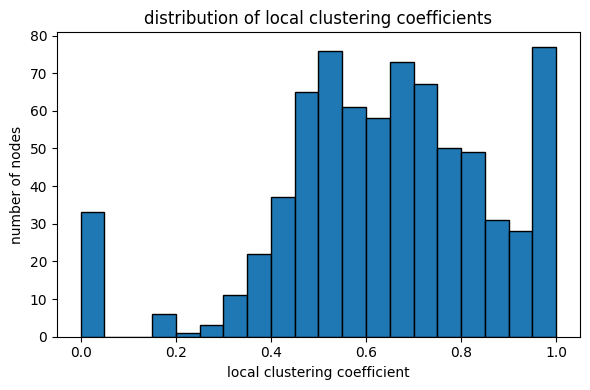

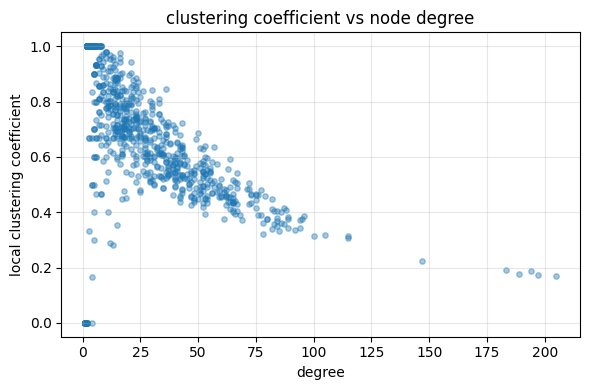

pearson correlation between degree and local clustering: -0.455


In [7]:
import numpy as np

# take the largest connected component of G
if not nx.is_connected(G):
    cc_nodes = sorted(nx.connected_components(G), key=len, reverse=True)[0]
    G_lcc = G.subgraph(cc_nodes).copy()
else:
    G_lcc = G.copy()

print(f"largest connected component: {G_lcc.number_of_nodes()} nodes, {G_lcc.number_of_edges()} edges")

# global characteristics
avg_clustering = nx.average_clustering(G_lcc)
diameter = nx.diameter(G_lcc)
radius = nx.radius(G_lcc)
avg_shortest_path = nx.average_shortest_path_length(G_lcc)

print(f"average clustering coefficient: {avg_clustering:.3f}")
print(f"diameter: {diameter}")
print(f"radius: {radius}")
print(f"average shortest path length: {avg_shortest_path:.3f}")

# local clustering coefficients per node
clustering_by_node = nx.clustering(G_lcc)

# histogram of local clustering coefficients
plt.figure(figsize=(6, 4))
plt.hist(list(clustering_by_node.values()), bins=20, edgecolor="black")
plt.xlabel("local clustering coefficient")
plt.ylabel("number of nodes")
plt.title("distribution of local clustering coefficients")
plt.tight_layout()
plt.show()

# scatter: clustering vs degree
degrees = dict(G_lcc.degree())
x_deg = np.array([degrees[n] for n in G_lcc.nodes()])
y_clust = np.array([clustering_by_node[n] for n in G_lcc.nodes()])

plt.figure(figsize=(6, 4))
plt.scatter(x_deg, y_clust, alpha=0.4, s=15)
plt.xlabel("degree")
plt.ylabel("local clustering coefficient")
plt.title("clustering coefficient vs node degree")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

corr_deg_clust = np.corrcoef(x_deg, y_clust)[0, 1]
print(f"pearson correlation between degree and local clustering: {corr_deg_clust:.3f}")

for a vertex i with  $k_i$ the local clustering coefficient

$$
C_i = \frac{2 e_i}{k_i (k_i - 1)},
$$

where $e_i$ is the number of edges between the neighbors of vertex $i\$
the average clustering coefficient of the graph

$$
\bar C = \frac{1}{n} \sum_{i=1}^n C_i.
$$

### 1.2. Path length

- Calculate the average length of the shortest path between two vertices of the graph

- Plot a histogram of the dependence of the average length of the shortest path on the degree of the vertex

global average shortest path (from node-wise averages): 3.097
nx.average_shortest_path_length: 3.097


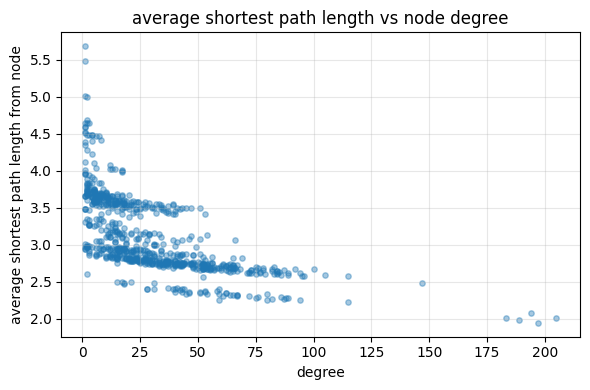

pearson correlation between degree and avg path length: -0.650


In [8]:
# closeness centrality for each node
closeness = nx.closeness_centrality(G_lcc)

# average shortest path length from each node is 1 / closeness for a connected graph
avg_path_by_node = {node: 1.0 / c for node, c in closeness.items()}

global_avg_from_nodes = np.mean(list(avg_path_by_node.values()))
print(f"global average shortest path (from node-wise averages): {global_avg_from_nodes:.3f}")
print(f"nx.average_shortest_path_length: {avg_shortest_path:.3f}")

deg_values = np.array([degrees[n] for n in G_lcc.nodes()])
avg_path_values = np.array([avg_path_by_node[n] for n in G_lcc.nodes()])

plt.figure(figsize=(6, 4))
plt.scatter(deg_values, avg_path_values, alpha=0.4, s=15)
plt.xlabel("degree")
plt.ylabel("average shortest path length from node")
plt.title("average shortest path length vs node degree")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

corr = np.corrcoef(deg_values, avg_path_values)[0, 1]
print(f"pearson correlation between degree and avg path length: {corr:.3f}")

closeness centrality of node i

$$
C_{\text{close}}(i) = \frac{n - 1}{\sum_{j \neq i} d(i, j)},
$$

$d(i, j)$ is the shortest path distance. The average shortest path length from node i

$$
\bar d(i) = \frac{1}{n-1} \sum_{j \neq i} d(i, j) = \frac{1}{C_{\text{close}}(i)}.
$$


`nx.average_shortest_path_length` ~3.1 which is a good consistency check.

average path length vs degree shows a clear negative trend higher-degree nodes tend to have smaller average
distances to all other nodes. The Pearson correlation -0.65(quite strong),  this confirms that hubs act as
central connectors that shorten paths throughout the network, while low-degree nodes lie more on the periphery.

### 1.3. Distribution of node degrees

- What is the distribution of node degrees? Run goodness-of-fit test and estimate parameters of the distribution.

min degree: 1, max degree: 205
mean degree: 30.11, median: 23.00
std of degree: 26.83


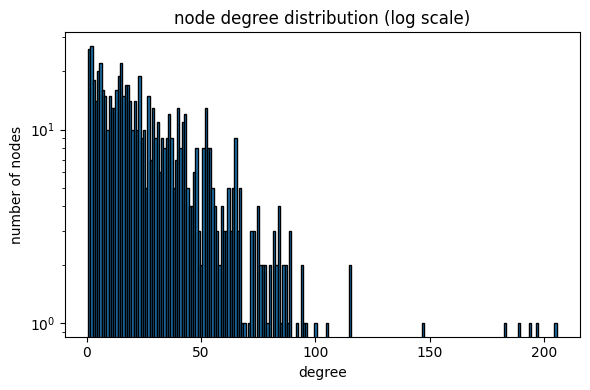

lognormal fit:
  shape=1.106, loc=0.000, scale=19.015
  ks statistic=0.090, p-value=9.629e-06
poisson fit:
  lambda=30.110
  ks statistic=0.420, p-value=7.864e-120


In [9]:
from scipy import stats as sps

# degree sequence
deg_sequence = np.array([d for _, d in G_lcc.degree()])

print(f"min degree: {deg_sequence.min()}, max degree: {deg_sequence.max()}")
print(f"mean degree: {deg_sequence.mean():.2f}, median: {np.median(deg_sequence):.2f}")
print(f"std of degree: {deg_sequence.std(ddof=1):.2f}")

# histogram of degrees with log scale on y
plt.figure(figsize=(6, 4))
bins = np.arange(deg_sequence.min(), deg_sequence.max() + 2) - 0.5
plt.hist(deg_sequence, bins=bins, edgecolor="black")
plt.xlabel("degree")
plt.ylabel("number of nodes")
plt.title("node degree distribution (log scale)")
plt.yscale("log")
plt.tight_layout()
plt.show()

# lognormal fit
shape, loc, scale = sps.lognorm.fit(deg_sequence, floc=0)
ks_lognorm = sps.kstest(deg_sequence, "lognorm", args=(shape, loc, scale))
print("lognormal fit:")
print(f"  shape={shape:.3f}, loc={loc:.3f}, scale={scale:.3f}")
print(f"  ks statistic={ks_lognorm.statistic:.3f}, p-value={ks_lognorm.pvalue:.3e}")

# poisson fit with lambda equal to sample mean
lambda_hat = deg_sequence.mean()
ks_poisson = sps.kstest(deg_sequence, "poisson", args=(lambda_hat,))
print("poisson fit:")
print(f"  lambda={lambda_hat:.3f}")
print(f"  ks statistic={ks_poisson.statistic:.3f}, p-value={ks_poisson.pvalue:.3e}")

Kolmogorov–Smirnov

$$
D_n = \sup_x \bigl|F_n(x) - F(x)\bigr|.
$$

small values of $D_n$ and large p‑values indicate that the sample is compatible with the hypothesized distribution, while large
$D_n$ and very small p‑values suggest rejecting the null hypothesis.

node degrees range from 1 to 205, with mean = 30.1, median 23 and standard deviation = 26.8. the degree
histogram on a logscaled y‑axis  shows a heavy tail: most nodes have moderate degrees, but a few nodes act as very high‑degree hubs.

the poisson fit is extremely poor (ks statistic = 0.420, p‑value =7.9  10^-120), so a  model is incompatible with the data. The lognormal fit is somewhat better (ks = 0.090, p‑value = 9.6*10^-6, but even it is formally rejected at the 0.05 level. In other words, the degree distribution is heavy‑tailed and does not follow a simple poisson law, it is closer to lognormal or power law‑like behavior.

### 1.4. Determine which are the most important and significant neurons in our brain?

In [10]:
import pandas as pd
# degree, closeness and betweenness centralities on the lcc
deg_centrality = nx.degree_centrality(G_lcc)
closeness_centrality = nx.closeness_centrality(G_lcc)
betweenness_centrality = nx.betweenness_centrality(G_lcc, normalized=True)

def top_k_nodes(cent_dict, k=10):
    return sorted(cent_dict.items(), key=lambda x: x[1], reverse=True)[:k]

top_deg = top_k_nodes(deg_centrality, k=10)
top_close = top_k_nodes(closeness_centrality, k=10)
top_betw = top_k_nodes(betweenness_centrality, k=10)

rows = []
for measure_name, top_list in [
    ("degree", top_deg),
    ("closeness", top_close),
    ("betweenness", top_betw),
]:
    for node_id, value in top_list:
        # use helper from the utils cell
        region, name, hemisphere, function = get_neuron_info(G_lcc.nodes[node_id])
        rows.append(
            {
                "measure": measure_name,
                "node": node_id,
                "centrality": value,
                "region": region,
                "area": name,
                "hemisphere": hemisphere,
                "function": function,
            }
        )

top_central_nodes = pd.DataFrame(rows)
display(top_central_nodes)

,measure,node,centrality,region,area,hemisphere,function
0,degree,503,0.274431,Subcortical,Right-caudate,Right,"Movement control, training"
1,degree,1008,0.263722,Subcortical,Left-thalamus-proper,Left,Transmission of sensory signals to the cortex
2,degree,504,0.259705,Subcortical,Right-putamen,Right,"Movement, skill formation"
3,degree,502,0.253012,Subcortical,Right-thalamus-proper,Right,Transmission of sensory signals to the cortex
4,degree,1009,0.244980,Subcortical,Left-caudate,Left,"Movement control, training"
5,degree,1010,0.196787,Subcortical,Left-putamen,Left,"Movement, skill formation"
6,degree,505,0.153949,Subcortical,Right-pallidum,Right,"Movement, regulation of motor functions"
7,degree,770,0.153949,Cortical,Superiorparietal,Left,"Spatial perception, attention"
8,degree,487,0.140562,Cortical,Insula,Right,"Body sensations, emotions, pain perception"
9,degree,127,0.133869,Cortical,Caudalmiddlefrontal,Right,"Planning, cognitive control"


across all three centrality measures, the same subcortical structures dominate Left-Thalamus-Proper Right-Thalamus-Proper, Left-Caudate, Right-Caudate, Left-Putamen, Right-Putamen. these are basal ganglia and thalamic regions, well known to be key hubs for motor control, learning, and routing sensory information to the cortex.

among cortical regions, high centrality nodes include Superiorparietal, Supramarginal, Postcentral, Precentral,
Posteriorcingulate, Inferiorparietal, Insula, and Caudalmiddlefrontal. they are involved in sensorimotor integration,
attention, and higher-order cognitive control.

so, the most important nodes structurally are not random: they match well with functionally central components of the brain
(motor system, somatosensory system, integrative parietal and cingulate areas).

### 1.5. Is the human brain a complex network? Why?

 yes, the human brain connectome clearly behaves like a complex network.

it has a high average clustering coefficient 0.64 together with short average path length  3.1 and moderate diameter 9 - typical small-world properties.  The degree distribution is heavy-tailed: most nodes have moderate degree, but there are a few strong hubs, which is not what we would expect from a simple random graph. Centrality measures highlight meaningful anatomical hubs (thalamus, basal ganglia, sensorimotor and associative cortical areas), indicating modular and hierarchical organization rather than homogeneous connectivity.These features - small-world structure, heavy-tailed degree distribution, and the presence of hubs and modules - are exactly what is usually meant by a complex network.

## Problem 2. Labeling of the brain connectome (30 points)

- Create an automatic labeling of the brain's connectome. Labeling refers to the division of connections into a number of groups, and the assignment of each vertex to one of these groups.

- Try several different labeling algorithms and describe how you chose the values for their parameters.

- Compare the results of the different algorithms to each other and to the original labeling.

In [13]:
from networkx.algorithms import community as nx_comm
from sklearn.metrics import adjusted_mutual_info_score, normalized_mutual_info_score
from collections import Counter, defaultdict

# use the largest connected component from problem 1
G_label = G_lcc
nodes_lcc = list(G_label.nodes())

# original anatomical labels (fsname canonized to merge parcels of the same area)
orig_area_labels = [
    canonize_key(G_label.nodes[n].get("dn_fsname", "N/A"))
    for n in nodes_lcc
]
unique_areas = sorted(set(orig_area_labels))
print(f"number of anatomical areas in lcc: {len(unique_areas)}")

# greedy modularity communities
greedy_comms = list(nx_comm.greedy_modularity_communities(G_label, weight="number_of_fibers"))
greedy_assign = {}
for cid, comm in enumerate(greedy_comms):
    for n in comm:
        greedy_assign[n] = cid
greedy_labels = [greedy_assign[n] for n in nodes_lcc]

#  asynchronous label propagation communities
lpa_comms = list(nx_comm.asyn_lpa_communities(G_label, weight="number_of_fibers", seed=42))
lpa_assign = {}
for cid, comm in enumerate(lpa_comms):
    for n in comm:
        lpa_assign[n] = cid
lpa_labels = [lpa_assign[n] for n in nodes_lcc]

# evaluate agreement with anatomical labels
for name, labels in [
    ("greedy modularity", greedy_labels),
    ("label propagation", lpa_labels),
]:
    ami = adjusted_mutual_info_score(orig_area_labels, labels)
    nmi = normalized_mutual_info_score(orig_area_labels, labels)
    print(f"{name}: clusters={len(set(labels))}, AMI={ami:.3f}, NMI={nmi:.3f}")

# summarize greedy communities by dominant anatomical areas
def summarize_communities(nodes, orig_labels, cluster_labels, max_top=5):
    communities = defaultdict(list)
    for n, orig, cl in zip(nodes, orig_labels, cluster_labels):
        communities[cl].append(orig)
    summary = {}
    for cid, labels in communities.items():
        counter = Counter(labels)
        total = len(labels)
        top = counter.most_common(max_top)
        summary[cid] = (total, top)
    return summary

greedy_summary = summarize_communities(nodes_lcc, orig_area_labels, greedy_labels)

for cid in sorted(greedy_summary.keys()):
    total, top_areas = greedy_summary[cid]
    print(f"\ncommunity {cid}: size={total}")
    for area, count in top_areas:
        print(f"  {area}: {count} nodes")

# store community ids as node attributes for later use
nx.set_node_attributes(G_label, greedy_assign, "community_greedy")
nx.set_node_attributes(G_label, lpa_assign, "community_lpa")

number of anatomical areas in lcc: 43
greedy modularity: clusters=8, AMI=0.329, NMI=0.373
label propagation: clusters=12, AMI=0.250, NMI=0.311

community 0: size=184
  Superiorfrontal: 43 nodes
  Precentral: 31 nodes
  Postcentral: 23 nodes
  Rostralmiddlefrontal: 17 nodes
  Caudalmiddlefrontal: 13 nodes

community 1: size=156
  Precentral: 36 nodes
  Postcentral: 21 nodes
  Supramarginal: 17 nodes
  Paracentral: 12 nodes
  Insula: 12 nodes

community 2: size=115
  Precuneus: 22 nodes
  Superiorparietal: 20 nodes
  Isthmuscingulate: 13 nodes
  Supramarginal: 12 nodes
  Posteriorcingulate: 10 nodes

community 3: size=109
  Lateraloccipital: 21 nodes
  Inferiorparietal: 17 nodes
  Lingual: 14 nodes
  Fusiform: 9 nodes
  Superiorparietal: 8 nodes

community 4: size=93
  Lateraloccipital: 16 nodes
  Inferiorparietal: 14 nodes
  Lingual: 14 nodes
  Fusiform: 12 nodes
  Superiorparietal: 7 nodes

community 5: size=46
  Superiorfrontal: 39 nodes
  Rostralmiddlefrontal: 6 nodes
  Caudalmiddlef

to compare different labelings U and V of the same set of nodes, mutual information is a natural measure:

$$
I(U, V) = \sum_{u, v} p(u, v) \log \frac{p(u, v)}{p(u)\,p(v)}.
$$

normalized mutual information nmi rescales it to [0, 1], while adjusted mutual information ami corrects for random
agreement between clusterings. ami = 0 means that the agreement is no better than random, ami = 1 means perfect match

Greedy modualrity finds 8 communities on the largest connected component, while asynchronous label propagation
finds 12. In terms of information-theoretic agreement with the original anatomical labels, greedy modularity performs
better:

greedy modularity: AMI = 0.329, NMI = 0.373
label propagation: AMI = 0.250, NMI = 0.311

If we look at the composition of greedy communities, they are quite consistent with anatomy: in some communities,
Precentral, Postcentral, Supramarginal, Paracentral, Insula (sensory-motor module) predominate, in others, Superiorparietal,
Precuneus, Posterior cingualte, Isthmus cingulate (parieto-cingulate network), in others - Lateral occipital, Lingual,
Fusiform (visual areas). Spreading the labels gives more, but less stable and sometimes noisy communities: one large cluster mixes many areas, while
several small clusters almost degenerate. Overall, greedy modularity gives clearer and more interpretable labeling that
better aligns with known anatomical and functional divisions.




## Problem 3. Assortativity (15 points)

- Рассмотрите:
  - Коннектом целиком
  - Различные области, найденные с помощью автоматической разметки, по отдельности
- Посчитайте для них ассортативность, постройте необходимые графики
- Проанализируйте результаты
- Consider:
  - Connect as a whole
  - Various areas found using automatic labeing individually
- Calculate the assortativity for them, plot the necessary graphs
- Analyze the results

degree assortativity (whole lcc): -0.024
attribute assortativity by region (cortical/subcortical): -0.009
attribute assortativity by hemisphere: 0.980

degree assortativity inside greedy communities:
  community 0: assortativity=-0.003
  community 1: assortativity=-0.133
  community 2: assortativity=-0.013
  community 3: assortativity=-0.082
  community 4: assortativity=-0.104
  community 5: assortativity=-0.082
  community 6: assortativity=-0.012
  community 7: assortativity=nan (too few edges)


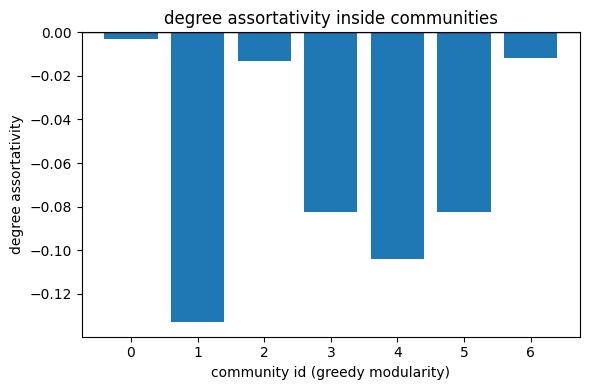

In [14]:
import numpy as np

# assortativity for the whole largest connected component
deg_assort_all = nx.degree_assortativity_coefficient(G_lcc)
region_assort_all = nx.attribute_assortativity_coefficient(G_lcc, "dn_region")
hemisphere_assort_all = nx.attribute_assortativity_coefficient(G_lcc, "dn_hemisphere")

print(f"degree assortativity (whole lcc): {deg_assort_all:.3f}")
print(f"attribute assortativity by region (cortical/subcortical): {region_assort_all:.3f}")
print(f"attribute assortativity by hemisphere: {hemisphere_assort_all:.3f}")

# assortativity inside greedy modularity communities
if "community_greedy" not in next(iter(G_lcc.nodes(data=True)))[1]:
    raise RuntimeError("run the community labeling cell (problem 2) first")

community_ids = sorted({data["community_greedy"] for _, data in G_lcc.nodes(data=True)})
assort_by_comm = {}

for cid in community_ids:
    nodes_in_comm = [n for n, data in G_lcc.nodes(data=True) if data["community_greedy"] == cid]
    sub = G_lcc.subgraph(nodes_in_comm)
    if sub.number_of_edges() < 2:
        assort = np.nan
    else:
        assort = nx.degree_assortativity_coefficient(sub)
    assort_by_comm[cid] = assort

print("\ndegree assortativity inside greedy communities:")
for cid, assort in assort_by_comm.items():
    if np.isnan(assort):
        print(f"  community {cid}: assortativity=nan (too few edges)")
    else:
        print(f"  community {cid}: assortativity={assort:.3f}")

# bar plot for community assortativity
valid_items = {cid: val for cid, val in assort_by_comm.items() if not np.isnan(val)}

plt.figure(figsize=(6, 4))
plt.bar(list(valid_items.keys()), list(valid_items.values()))
plt.axhline(0.0, color="black", linewidth=1)
plt.xlabel("community id (greedy modularity)")
plt.ylabel("degree assortativity")
plt.title("degree assortativity inside communities")
plt.tight_layout()
plt.show()

degree assortativity can be viewed as a pearson correlation between degrees at the ends of an edge. if we denote the degree of
node u by $k_u$, then

$$
r = \frac{\sum_{(u, v) \in E} (k_u - \mu)(k_v - \mu)}
{\sum_{(u, v) \in E} (k_u - \mu)^2},
$$

$\mu$ is the mean degree at edge ends,positive r means assortative mixing (high-degree nodes tend to connect to
high-degree nodes), negative r\ means disassortative mixing (hubs connect more to low-degree nodes).

For the whole largest connected component, the degree assortativity coefficient is slightly negative −0.024, so the connectome is mildly disassortative: hubs connect somewhat more to nodes of lower degree rather than forming a
dense club of high-degree nodes.

assortativity by dn_region (cortical vs subcortical) is very close to zero (−0.009), meaning that connectivity between
cortical and subcortical nodes is roughly balanced. hemispheric assortativity is extremely high (~0.98): most edges are within the same hemisphere, which is biologically expected.

inside greedy communities, degree assortativity is also mostly slightly negative, with values between about −0.13 and 0, except for a tiny community with too few edges. so even within modules, hubs tend to connect to less connected nodes rather than to each
other. this points to a core–periphery type organization rather than a purely assortative structure like many social networks.

## Problem 4. Transcranial magnetic stimulation (30 points)

__[Transcranial magnetic stimulation (TMS)](https://en.wikipedia.org/wiki/Transcranial_magnetic_stimulation)__ - a method that allows noninvasively stimulating the cerebral cortex. It is used for the rehabilitation of patients (for example, with motor disorders), and for the treatment of various diseases: Parkinson's disease, epilepsy, depression, schizophrenia, and others.

We would like to suggest that you conduct a TMS on your "patient". For this, you will need:

- "Weigh" the edges of the graph. For example, using some metric that decreases with increasing distance between vertices.

- Apply TMS to different areas of the brain. See how far the signal will spread, which areas it will affect, and what functions these areas are responsible for.

  Various methods can be used to implement signal propagation: `message passing', `random walk', `heat diffusion' and others.

  Try different methods (two or more), compare the results.

---

To determine which areas of the brain should be targeted with TMS, you can refer to scientific articles. For example:

__[Evidence-based guidelines on the therapeutic use of repetitive transcranial magnetic stimulation (rTMS)](https://www.sciencedirect.com/science/article/pii/S1388245719312799?via%3Dihub)__.

This article contains many studies that stimulated various areas of the brain using TMS. It also describes the symptoms of patients and the results of TMS use.

---

For example, in the picture below you can see:

- The patient's symptom is a motor disorder of the hand as a result of stroke.

- The area of application of TMS is the M1 zone. You can use a __[map of brain regions](https://atlas.brain-map.org/atlas?atlas=265297126)__ to orient yourself in the areas of a brain.

- The result of the therapy is an improvement in the patient's motor functions.

![lab_1_example.png](attachment:lab_1_example.png)

---

Good luck!

In [16]:
import numpy as np
import math

# add distance-based tms weights on edges
def add_tms_edge_weights(G):
    """add 'euclidean_dist' and 'tms_weight' attributes to edges."""
    dists = []
    for u, v, data in G.edges(data=True):
        x1 = float(G.nodes[u]["dn_position_x"])
        y1 = float(G.nodes[u]["dn_position_y"])
        z1 = float(G.nodes[u]["dn_position_z"])
        x2 = float(G.nodes[v]["dn_position_x"])
        y2 = float(G.nodes[v]["dn_position_y"])
        z2 = float(G.nodes[v]["dn_position_z"])
        dist = math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2 + (z1 - z2) ** 2)
        data["euclidean_dist"] = dist
        dists.append(dist)
    scale = np.mean(dists)
    for u, v, data in G.edges(data=True):
        dist = data["euclidean_dist"]
        # closer regions get stronger coupling; far regions weaker
        data["tms_weight"] = math.exp(-dist / scale)

# work on a copy of the lcc
G_tms = G_lcc.copy()
add_tms_edge_weights(G_tms)

nodes_tms = list(G_tms.nodes())
idx_of = {n: i for i, n in enumerate(nodes_tms)}
n = len(nodes_tms)

# weighted adjacency for tms weights
W = np.zeros((n, n), dtype=float)
for u, v, data in G_tms.edges(data=True):
    i, j = idx_of[u], idx_of[v]
    w = data["tms_weight"]
    W[i, j] = w
    W[j, i] = w

row_sums = W.sum(axis=1)
row_sums[row_sums == 0.0] = 1.0
P = W / row_sums[:, None]  # transition matrix for a random walk

# choose tms source: left precentral (primary motor cortex, M1)
tms_sources = [
    n
    for n, data in G_tms.nodes(data=True)
    if "precentral" in str(data.get("dn_fsname", "")).lower()
    and data.get("dn_hemisphere", "").lower() == "left"
]
print(f"number of tms source nodes (left precentral): {len(tms_sources)}")

def random_walk_influence(P, sources, idx_of, n_steps=5):
    """simulate a random walk starting from source nodes; return probability vector after n_steps."""
    n = P.shape[0]
    p = np.zeros(n, dtype=float)
    src_idx = [idx_of[s] for s in sources]
    p[src_idx] = 1.0 / len(src_idx)
    for _ in range(n_steps):
        p = p @ P
    return p

def heat_diffusion(P, sources, idx_of, n_steps=10, alpha=0.3):
    """
    simulate heat diffusion on the graph.

    update rule: h_{t+1} = h_t + alpha * (P^T h_t - h_t).
    alpha controls how fast the signal spreads (0 < alpha < 1).
    """
    n = P.shape[0]
    h = np.zeros(n, dtype=float)
    src_idx = [idx_of[s] for s in sources]
    h[src_idx] = 1.0
    for _ in range(n_steps):
        h = h + alpha * (P.T @ h - h)
    return h

p_rw = random_walk_influence(P, tms_sources, idx_of, n_steps=5)
h_heat = heat_diffusion(P, tms_sources, idx_of, n_steps=10, alpha=0.3)

def show_top_areas(scores, nodes, G, k=15, title=""):
    top_idx = np.argsort(-scores)[:k]
    print(f"\n{title}")
    for i in top_idx:
        node = nodes[i]
        region, area, hemisphere, function = get_neuron_info(G.nodes[node])
        print(
            f"node {node}: score={scores[i]:.4f}, "
            f"{hemisphere} {area} ({region}) — {function}"
        )

show_top_areas(p_rw, nodes_tms, G_tms, k=15, title="random walk influence (tms at left precentral)")
show_top_areas(h_heat, nodes_tms, G_tms, k=15, title="heat diffusion influence (tms at left precentral)")

number of tms source nodes (left precentral): 31

random walk influence (tms at left precentral)
node 723: score=0.0123, Left Postcentral (Cortical) — Sensory information, sense of touch
node 632: score=0.0123, Left Caudalmiddlefrontal (Cortical) — Planning, cognitive control
node 676: score=0.0119, Left Precentral (Cortical) — Movement control (motor cortex)
node 757: score=0.0116, Left Supramarginal (Cortical) — Speech comprehension, sensorimotor integration
node 664: score=0.0112, Left Precentral (Cortical) — Movement control (motor cortex)
node 1010: score=0.0111, Left Left-putamen (Subcortical) — Movement, skill formation
node 1009: score=0.0109, Left Left-caudate (Subcortical) — Movement control, training
node 744: score=0.0108, Left Postcentral (Cortical) — Sensory information, sense of touch
node 769: score=0.0103, Left Superiorparietal (Cortical) — Spatial perception, attention
node 738: score=0.0102, Left Postcentral (Cortical) — Sensory information, sense of touch
node 661: 

a random walk on a graph with transition matrix P evolves according to

$$
p_{t+1} = p_t P,
$$

 $p_t$ is the probability distribution over nodes at step t, heat diffusion on a graph is classically defined via the graph laplacian L = D - W

$$
h(t) = e^{-tL} h(0).
$$

in discrete time

$$
h_{t+1} = h_t + \alpha (P^\top h_t - h_t),
$$

which can be interpreted as smoothing along the edges each node receives some fraction of signal from its neighbors and loses some of its own

 When we simulate TMS applied to the left precentral area (primary motor cortex, M1), both models
produce a very plausible pattern of influence.The weighted random walk model, after several steps, highlights not only nodes within the left precentral gyrus, but also
neighboring Postcentral (primary somatosensory cortex), Supramarginal, Superiorparietal, and Insula. subcortical motor
structures like Left-Putamen and Left-Caudate also receive relatively high scores. this matches the idea that stimulating M1
should affect both the motor output system and nearby sensorimotor integration areas. The heat diffusion model emphasizes local spreading even more: the strongest activation remains in multiple parcels of Left
Precentral, then in adjacent Postcentral parcels, followed by frontal areas like Caudalmiddlefrontal and parietal areas such
as Supramarginal and Superiorparietal. Again, subcortical motor nuclei (Left-Putamen) and nearby Insula are also
affected, both approaches suggest that TMS over M1 should modulate a network of regions involved in motor control and sensory
feedback, not just a single cortical spot. This aligns well with clinical observations that TMS for motor symptoms influences
distributed sensorimotor circuits.